In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
# Load the CSV file
file_path = 'D:\Python projects\Machine Learning\car_price_data.csv'  # Provide the correct relative or absolute path to your CSV file
df = pd.read_csv(file_path)

# Check if the file is loaded correctly
df.head()  # Display the first 5 rows of the dataframe


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [69]:
textual_columns = df.select_dtypes(include=['object', 'int'])

# Loop through each textual column and display the number of unique values
for column in textual_columns.columns:
    # Get the number of unique values in the column
    num_unique = df[column].nunique()
    
    print(f"Column: {column} : {num_unique}")

Column: MSRP : 6049


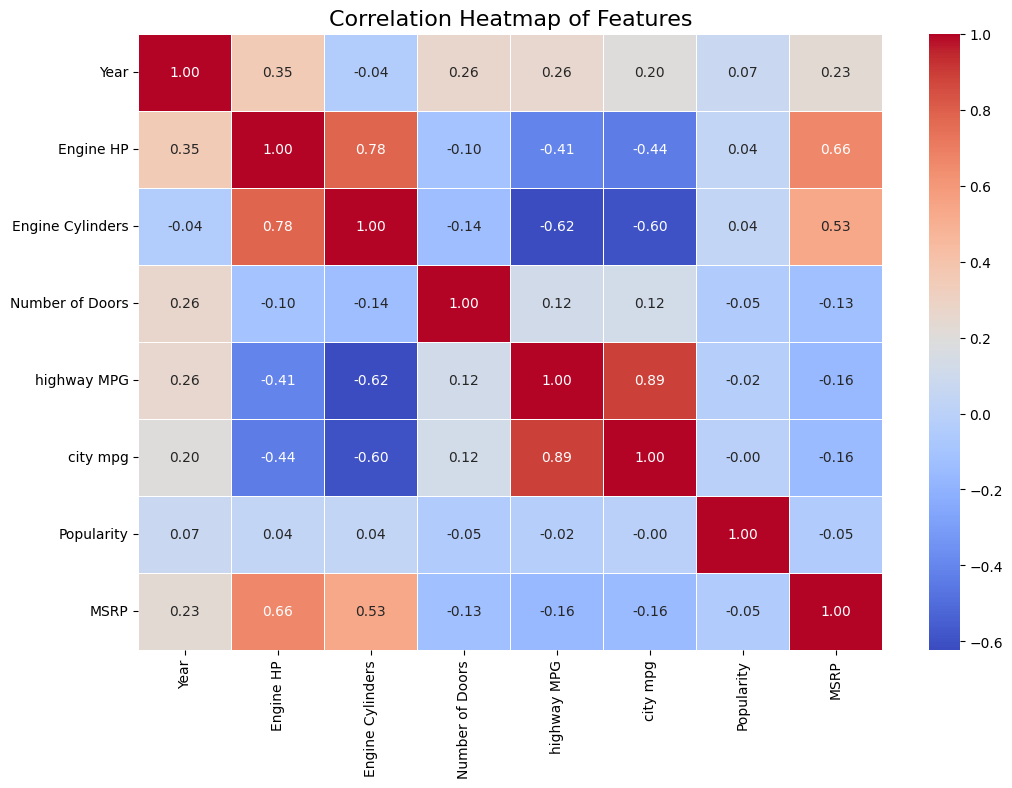

In [61]:
# Select only numeric columns (correlation works with numerical data)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Add title and labels
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

               Feature  Importance
1            Engine HP    0.329785
2     Engine Cylinders    0.317215
543    Model_Landaulet    0.050630
734     Model_Reventon    0.043188
5             city mpg    0.041270
12        Make_Bugatti    0.038463
910  Model_Veyron 16.4    0.035347
0                 Year    0.031896
6           Popularity    0.024419
4          highway MPG    0.012856


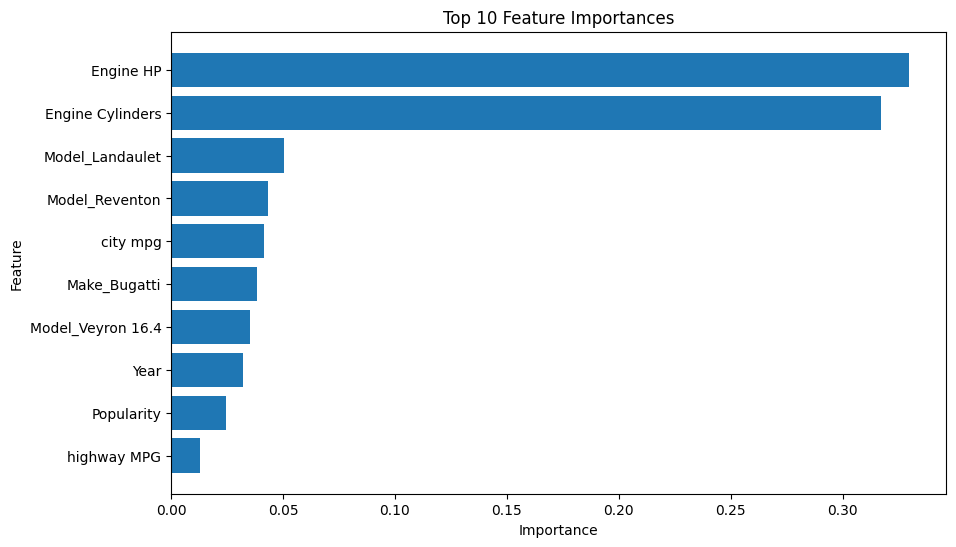

In [62]:
# Assuming 'df' is your dataframe and 'MSRP' is the target variable
X = df.drop(columns=['MSRP'])  # Features
y = df['MSRP']  # Target

# Convert categorical data to numeric using one-hot encoding (if not done already)
X = pd.get_dummies(X, drop_first=True)

# Initialize and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance scores
feature_importances = model.feature_importances_

# Create a dataframe to view the importance scores
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Show top 10 important features
print(importance_df.head(10))

# Plotting feature importance

plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.gca().invert_yaxis()  # To display the highest importance on top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()


In [63]:
textual_columns = df.select_dtypes(include=['object'])

# Loop through each textual column and display the number of unique values
for column in textual_columns.columns:
    # Get the number of unique values in the column
    num_unique = df[column].nunique()
    
    print(f"Column: {column} : {num_unique}")

Column: Make : 48
Column: Model : 915
Column: Engine Fuel Type : 10
Column: Transmission Type : 5
Column: Driven_Wheels : 4
Column: Market Category : 71
Column: Vehicle Size : 3
Column: Vehicle Style : 16


In [64]:
columns_to_drop = ['Year', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'Engine Fuel Type', 
                   'Driven_Wheels', 'Vehicle Size', 'Vehicle Style', 'Make', 'Model', 'Market Category']
df = df.drop(columns=columns_to_drop)

# Display the updated DataFrame
df.head()

,Engine HP,Engine Cylinders,Transmission Type,MSRP
0,335.0,6.0,MANUAL,46135
1,300.0,6.0,MANUAL,40650
2,300.0,6.0,MANUAL,36350
3,230.0,6.0,MANUAL,29450
4,230.0,6.0,MANUAL,34500


In [65]:
# Apply one-hot encoding to the 'Transmission Type' column
df = pd.get_dummies(df, columns=['Transmission Type'], drop_first=False)
msrp_column = df.pop('MSRP')
df['MSRP'] = msrp_column

# Display the first few rows of the updated dataframe
df.head()

,Engine HP,Engine Cylinders,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,Transmission Type_UNKNOWN,MSRP
0,335.0,6.0,False,False,False,True,False,46135
1,300.0,6.0,False,False,False,True,False,40650
2,300.0,6.0,False,False,False,True,False,36350
3,230.0,6.0,False,False,False,True,False,29450
4,230.0,6.0,False,False,False,True,False,34500


In [73]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the 'Engine HP' column
df['Engine HP'] = scaler.fit_transform(df[['Engine HP']])
df['Engine Cylinders'] = scaler.fit_transform(df[['Engine Cylinders']])

# Display the first few rows of the updated dataframe
df.head()

,Engine HP,Engine Cylinders,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,Transmission Type_UNKNOWN,MSRP
0,0.295983,0.375,False,False,False,True,False,46135
1,0.258985,0.375,False,False,False,True,False,40650
2,0.258985,0.375,False,False,False,True,False,36350
3,0.184989,0.375,False,False,False,True,False,29450
4,0.184989,0.375,False,False,False,True,False,34500


In [76]:
# Define the feature columns (X) and target column (y)
X = df.drop(columns=['MSRP'])  # Drop the target column
y = df['MSRP']  # Target column

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the size of the splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 9531
Test set size: 2383


In [79]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 284962119.70149153
R-squared: 0.8804473448436697
